# 1.安装数据包

In [1]:
# 数据分析的核心库

import sys
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from pandas import datetime
import random
# 时间序列处理
import time
from datetime import datetime
from dateutil.parser import parse as dt_parse
# 正则库
import re
# os库
from os import listdir
# NLTK自然语言处理库
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.corpus import stopwords
# seaborn成对图矩阵生成
from seaborn import pairplot
# sklearn库的归一化、训练集测试集划分
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# Keras LSTM
import tensorflow 
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer
from tensorflow.keras import Model, layers, initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling1D, Flatten, Activation, GRU
from tensorflow.keras.layers import Multiply, Input,Dense, Dropout, Conv1D, LSTM, Bidirectional, TimeDistributed
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping
# ARIMA 
import statsmodels.api as sm
import statsmodels.tsa as ts
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
import itertools as it
#from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError
# sklearn MSE
from sklearn import metrics
from sklearn.metrics import mean_squared_error
# GridSearchCV
from sklearn.model_selection import GridSearchCV

import os
 
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  # Remove the CWD from sys.path while we load stuff.


# 2.Pandas 显示设置

In [2]:
# 设置pandas的最大显示行数、列数和输出宽度
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_colwidth', 50)

# 3.预处理数据

## 3.1 处理股票数据
数据来源：Yahoo网 2017年起 5年的股票数据

In [3]:
sharePricesTSLA = pd.read_csv('file/five_year/TSLA_5years_price.csv')
sharePricesTSLA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017/10/20,23.512667,23.636667,22.955999,23.006666,23.006666,73956000
1,2017/10/23,23.325333,23.330000,22.416668,22.468000,22.468000,86209500
2,2017/10/24,22.586666,22.853333,22.410667,22.489332,22.489332,67375500
3,2017/10/25,22.446667,22.500000,21.570667,21.722668,21.722668,128911500
4,2017/10/26,21.851999,22.015333,21.546667,21.744667,21.744667,75352500
...,...,...,...,...,...,...,...
1270,2022/11/7,208.649994,208.899994,196.660004,197.080002,197.080002,93916500
1271,2022/11/8,194.020004,195.199997,186.750000,191.300003,191.300003,128803400
1272,2022/11/9,190.779999,195.889999,177.119995,177.589996,177.589996,127062700
1273,2022/11/10,189.899994,191.000000,180.029999,190.720001,190.720001,132703000


In [4]:
sharePricesTSLA.drop(['Adj Close'],axis=1,inplace=True)

In [5]:
sharePricesTSLA.info()
sharePricesTSLA['Date'].is_unique

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1275 non-null   object 
 1   Open    1275 non-null   float64
 2   High    1275 non-null   float64
 3   Low     1275 non-null   float64
 4   Close   1275 non-null   float64
 5   Volume  1275 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.9+ KB


True

In [6]:
# date列转化为datetime类
sharePricesTSLA['Date'] = sharePricesTSLA['Date'].apply(lambda dt: dt_parse(dt))
# 设date列为索引
sharePricesTSLA.set_index('Date', inplace=True)
# 按date升序排列
sharePricesTSLA.sort_values(by='Date', inplace=True, ascending=True)
sharePricesTSLA

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-20,23.512667,23.636667,22.955999,23.006666,73956000
2017-10-23,23.325333,23.330000,22.416668,22.468000,86209500
2017-10-24,22.586666,22.853333,22.410667,22.489332,67375500
2017-10-25,22.446667,22.500000,21.570667,21.722668,128911500
2017-10-26,21.851999,22.015333,21.546667,21.744667,75352500
...,...,...,...,...,...
2022-11-07,208.649994,208.899994,196.660004,197.080002,93916500
2022-11-08,194.020004,195.199997,186.750000,191.300003,128803400
2022-11-09,190.779999,195.889999,177.119995,177.589996,127062700


In [7]:
# 缺失值处理：
#拉格朗日插值法或mean法
sharePricesTSLA.dropna()
sharePricesTSLA.isnull().mean()

Open      0.0
High      0.0
Low       0.0
Close     0.0
Volume    0.0
dtype: float64

In [8]:
# rename
TSLA_newIndex = {'Open': 'open',
                 'High': 'high',
                 'Low': 'low',
                 'Volume':'vol','Close': 'close'}
sharePricesTSLA.rename(columns=TSLA_newIndex, inplace=True)
# reindex
TSLA_newColOrder = ['open', 'high', 'low', 'vol','close']
sharePricesTSLA = sharePricesTSLA.reindex(columns=TSLA_newColOrder)

sharePricesTSLA.describe()

,open,high,low,vol,close
count,1275.000000,1275.000000,1275.000000,1.275000e+03,1275.000000
mean,126.783987,129.708590,123.575296,1.312525e+08,126.704271
std,118.967644,121.672652,115.889737,8.994064e+07,118.789039
min,12.073333,12.445333,11.799333,2.940180e+07,11.931333
25%,20.862668,21.170000,20.416668,7.493820e+07,20.836666
50%,54.344666,55.066666,52.436668,1.011045e+08,53.720669
75%,234.961670,239.565002,229.713333,1.517534e+08,235.671669
max,411.470001,414.496674,405.666656,9.140820e+08,409.970001


In [9]:
sharePricesTSLA.to_csv('file/five_year/five_result/TSLA_stockprice_5Y.csv')

## 3.2 论坛信息处理
缺失值处理：commentator一列不需要，故不做缺失值处理，直接删除
重构索引 提取时间rep_date1，title

In [10]:
forum = pd.read_excel('file/five_year/TSLA_forum.xlsx')
forum.drop(['commentator'],axis=1,inplace=True)
forum

,title,rep_date1,rep_date2,rep_date3
0,"As I said $175 is a good buy, all these talker...","Nov 11, 2022, 23:54","Nov 11, 2022","Nov 11, 2022"
1,There is a little Dead cat smell in the room.,"Nov 11, 2022, 12:29","Nov 11, 2022","Nov 11, 2022"
2,He sold 19 b. already.,"Nov 11, 2022, 08:25","Nov 11, 2022","Nov 11, 2022"
3,I think 200 will go up easily today. sprinkle ...,"Nov 11, 2022, 06:58","Nov 11, 2022","Nov 11, 2022"
4,Hkd soon🚀🚀🚀🚀🚀,"Nov 11, 2022, 06:42","Nov 11, 2022","Nov 11, 2022"
...,...,...,...,...
42811,Will it retract a bit from here?...The 300 sup...,"Dec 12, 2017, 09:22","Dec 12, 2017","Dec 12, 2017"
42812,Tesla Correlation Histogram is Not a Normal Di...,"Dec 09, 2017, 13:58","Dec 09, 2017","Dec 09, 2017"
42813,"Look corrado wrong again, just give it up bud....","Dec 09, 2017, 04:52","Dec 09, 2017","Dec 09, 2017"
42814,The crash will be big and unexpected.get ready...,"Dec 08, 2017, 04:12","Dec 08, 2017","Dec 08, 2017"


In [11]:
#删除缺失值
forum.dropna()

# 降维处理
forum.drop(['rep_date1', 'rep_date2'], axis=1, inplace=True)
# 索引重构
TSLA_newIndex_forum = {'rep_date3': 'Date', 'title': 'Remark'}
forum.rename(columns=TSLA_newIndex_forum, inplace=True)
forum

,Remark,Date
0,"As I said $175 is a good buy, all these talker...","Nov 11, 2022"
1,There is a little Dead cat smell in the room.,"Nov 11, 2022"
2,He sold 19 b. already.,"Nov 11, 2022"
3,I think 200 will go up easily today. sprinkle ...,"Nov 11, 2022"
4,Hkd soon🚀🚀🚀🚀🚀,"Nov 11, 2022"
...,...,...
42811,Will it retract a bit from here?...The 300 sup...,"Dec 12, 2017"
42812,Tesla Correlation Histogram is Not a Normal Di...,"Dec 09, 2017"
42813,"Look corrado wrong again, just give it up bud....","Dec 09, 2017"
42814,The crash will be big and unexpected.get ready...,"Dec 08, 2017"


In [12]:
# 时间date序列
forum['Date'] = forum['Date'].apply(lambda dt: dt_parse(dt))
#.apply(lambda dt: datetime.strptime(str(dt), '%d-%b-%y'))
# 按date升序排列
forum.sort_values(by='Date', inplace=True, ascending=True)
# 用正则表达式屏蔽网站
forum_regExp_linkFilter = re.compile(r'(http|https):\/\/[\w\-_]+(\.[\w\-_]+)+（.com）+([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?')
forum['Remark'] = forum['Remark'].apply(lambda x: forum_regExp_linkFilter.sub('', x))
forum
# 关于TSLA的论坛数据储存
forum.to_csv('file/five_year/five_result/TSLA_forum_5Y.csv',encoding="utf_8_sig", index=False)

## 3.3 标题数据处理

In [13]:
# 对TSLA标题数据进行降维处理，重构索引，升序排列
titles = pd.read_excel('file/five_year/TSLA_title.xlsx')

# 降维处理
titles.drop(['日期'], axis=1, inplace=True)
# 索引重构
TSLA_newIndex_titles = {'标题': 'Title', 'date': 'Date'}
titles.rename(columns=TSLA_newIndex_titles, inplace=True)
# 时间序列处理
# 因时间日期格式非统一，故选用dateutil包对parser.parse方法识别多变时间格式
titles['Date'] = titles['Date'].apply(lambda dt: dt_parse(dt))
# 设date列为索引
titles.set_index('Date', inplace=True)
# 按date升序排列
titles.sort_values(by='Date', inplace=True, ascending=True)
# 数据储存
titles.to_csv('file/five_year/five_result/TSLA_title_5Y.csv')
titles

,Title
Date,
2017-10-22,"3 Stocks To Watch: AMTD, MSFT, TSLA"
2017-10-23,"With Shanghai Factory, Tesla Hopes To Gain Gro..."
2017-10-24,"Adobe, Tesla, Alphabet Inc., Apple And Amazon ..."
2017-10-25,"AI In Action: DeepStack, DeepMind, And Deep Le..."
2017-10-25,Why Sony (SNE) Is A Strong Value Stock
...,...
2022-11-08,Stocks Push Higher as the VIX Continues to Melt
2022-11-08,Terrifying Tesla Top
2022-11-09,The Market May Be Setting Up to Break Sharply ...


## 3.4 摘要数据处理

In [14]:
abstracts = pd.read_excel('file/five_year/TSLA_abs.xlsx')
abstracts

,标题,字段
0,Terrifying Tesla Top,What a week - the votes in the US congressiona...
1,Stocks Push Higher as the VIX Continues to Melt,EU and US futures continue the rebound from th...
2,S&P 500 Could Benefit From Seasonality In Nove...,Stocks finished yesterday higher by around 56 ...
3,A Big Week For Markets,Just look at this. The main point I want to ma...
4,Are The FANG Stocks Dead?,"Stocks finished the day higher on Monday, foll..."
...,...,...
3488,Is David Einhorn Right That Value Investing Is...,Leading U.S. solar-panel manufacturer First So...
3489,Why Sony (SNE) Is A Strong Value Stock,The US Dollar was under pressure with the US D...
3490,"Adobe, Tesla, Alphabet Inc., Apple And Amazon ...",Welcome back to Mind Over Money. I'm Kevin Coo...
3491,"With Shanghai Factory, Tesla Hopes To Gain Gro...",(0:45) - Are Value Investors Getting Nervous?(...


In [15]:
# 缺失值填充
abstracts.fillna(method='bfill', inplace=True)
newIndex_abstracts = {'标题': 'Title', '字段': 'Abstract'}
abstracts.rename(columns=newIndex_abstracts, inplace=True)
# 用正则表达式屏蔽网站
abstracts_regExp_linkFilter = re.compile(r'(http|https):\/\/[\w\-_]+(\.[\w\-_]+)+（.com）+([\w\-\.,@?^=%&:/~\+#]*[\w\-\@?^=%&/~\+#])?')
abstracts['Title'] = abstracts['Title'].apply(lambda x: forum_regExp_linkFilter.sub('', x))
abstracts['Abstract'] = abstracts['Abstract'].apply(lambda x: forum_regExp_linkFilter.sub('', x))
abstracts
# 保存摘要数据
abstracts.to_csv('file/five_year/five_result/TSLA_abs_5Y.csv',encoding="utf_8_sig", index=False)

## 3.5 回帖数据处理

In [16]:
#读取回帖数据
allTSLAReplies = pd.read_excel('file/five_year/TSLA_reply.xlsx')
allTSLAReplies

,rep_date1,rep_date2,rep_date3,字段1,字段2,字段3,字段
0,"Nov 12, 2022","Nov 12, 2022","Nov 12, 2022, 24:23","Obviously, but it will not dip there for while...",NaN,NaN,"Obviously, but it will not dip there for while..."
1,"Nov 11, 2022","Nov 11, 2022","Nov 11, 2022, 16:38","I think that's victos basement, it's full of t...",NaN,NaN,"I think that's victos basement, it's full of t..."
2,"Nov 11, 2022","Nov 11, 2022","Nov 11, 2022, 08:43",144 b to go.,Jealous? Sell yours if you need money,NaN,144 b to go.Jealous? Sell yours if you need money
3,"Nov 12, 2022","Nov 12, 2022","Nov 12, 2022, 08:23","Where are you, Darth? Some days you are all t...",Sup homie 😋😋,"lol. Tesla, I hope. :-)","Where are you, Darth? Some days you are all t..."
4,"Nov 11, 2022","Nov 11, 2022","Nov 11, 2022, 03:56","$21B of cash, yes",yes they talked about doing 5-10 billion dolla...,yes they should do them now.,"$21B of cash, yesyes they talked about doing 5..."
...,...,...,...,...,...,...,...
19916,"Dec 13, 2017","Dec 13, 2017","Dec 13, 2017, 05:38",I just added to my short position and will kee...,NaN,NaN,I just added to my short position and will kee...
19917,"Dec 12, 2017","Dec 12, 2017","Dec 12, 2017, 09:51",Stock Should glide up along side the rate of t...,NaN,NaN,Stock Should glide up along side the rate of t...
19918,"Dec 09, 2017","Dec 09, 2017","Dec 09, 2017, 20:59","Well, it could be true if you weren't so obses...",The only reason is if tesla drop down to $140...,NaN,"Well, it could be true if you weren't so obses..."
19919,"Dec 08, 2017","Dec 08, 2017","Dec 08, 2017, 17:01",Looks like you cheer yourself up every day. Co...,NaN,NaN,Looks like you cheer yourself up every day. Co...


In [17]:
#删除缺失值
allTSLAReplies.dropna()
allTSLAReplies.drop(['rep_date2','rep_date3','字段1', '字段2', '字段3'], axis=1, inplace=True)
allTSLAReplies

,rep_date1,字段
0,"Nov 12, 2022","Obviously, but it will not dip there for while..."
1,"Nov 11, 2022","I think that's victos basement, it's full of t..."
2,"Nov 11, 2022",144 b to go.Jealous? Sell yours if you need money
3,"Nov 12, 2022","Where are you, Darth? Some days you are all t..."
4,"Nov 11, 2022","$21B of cash, yesyes they talked about doing 5..."
...,...,...
19916,"Dec 13, 2017",I just added to my short position and will kee...
19917,"Dec 12, 2017",Stock Should glide up along side the rate of t...
19918,"Dec 09, 2017","Well, it could be true if you weren't so obses..."
19919,"Dec 08, 2017",Looks like you cheer yourself up every day. Co...


In [18]:
allTSLAReplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19921 entries, 0 to 19920
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rep_date1  19921 non-null  object
 1   字段         19921 non-null  object
dtypes: object(2)
memory usage: 311.4+ KB


In [19]:
# 索引重构
reply_newIndex_titles = {'rep_date1': 'Date', '字段': 'Content'}
allTSLAReplies.rename(columns=reply_newIndex_titles, inplace=True)
allTSLAReplies

,Date,Content
0,"Nov 12, 2022","Obviously, but it will not dip there for while..."
1,"Nov 11, 2022","I think that's victos basement, it's full of t..."
2,"Nov 11, 2022",144 b to go.Jealous? Sell yours if you need money
3,"Nov 12, 2022","Where are you, Darth? Some days you are all t..."
4,"Nov 11, 2022","$21B of cash, yesyes they talked about doing 5..."
...,...,...
19916,"Dec 13, 2017",I just added to my short position and will kee...
19917,"Dec 12, 2017",Stock Should glide up along side the rate of t...
19918,"Dec 09, 2017","Well, it could be true if you weren't so obses..."
19919,"Dec 08, 2017",Looks like you cheer yourself up every day. Co...


In [20]:
# 保存
allTSLAReplies.to_csv('file/five_year/five_result/TSLA_rep_5Y.csv',encoding="utf_8_sig", index=False)

## 3.6 季报语音数据处理

In [21]:
trans = pd.read_csv('file/five_year/trans_final_5y.csv')
trans
# 以utf_8编码形式保存到output_file
trans.to_csv('file/five_year/five_result/trans_5Y.csv',encoding="utf_8_sig", index=False)

# 4.情感分析
## 4.1 情感数据构建

In [22]:
#import nltk
#nltk.download('stopwords')

# 词库导入
wordListsPath = 'file/five_year/LoughranMcDonald_SentimentWordLists.xlsx'
posWords = pd.read_excel(wordListsPath, header=None, sheet_name='Positive').iloc[:,0].values
negWords = pd.read_excel(wordListsPath, header=None, sheet_name='Negative').iloc[:,0].values

# 添加停用词
extraStopwords = ['!', ',' ,'.' ,'?' ,'-s' ,'-ly' ,'</s> ', 's', 'TSLA', 'tesla', '$', '%','1','2','3','4',
                     '5','6','7','8','9','0','car']
stopWs = stopwords.words('english') + extraStopwords
stopWs

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 '

In [23]:
# 定义一个结构语句函数
def structComment(sentence, posW, negW, stopW):
    """
    结构化句子
    :param sentence: 待结构化的评论
    :param posW: 正词性
    :param negW: 负词性
    :param stopW: 停用词
    :return: 去除停用词后的评论中posWords和negWords的占比(pos, neg)
    """
    # 分词
    tokenizer = nltk.word_tokenize(sentence)
    # 停用词过滤
    tokenizer = [w.upper() for w in tokenizer if w.lower() not in stopW]
    # 正词提取
    posWs = [w for w in tokenizer if w in posW]
    # 负词提取
    negWs = [w for w in tokenizer if w in negW]
    # tokenizer长度
    len_token = len(tokenizer)
    # 句子长度为0，即分母为0时
    if len_token<=0:
        return 0, 0
    else:
        return len(posWs)/len_token, len(negWs)/len_token

In [24]:
# 定义一个NLP函数
def NLProcessing(fileName, colName):
    """
    自然语言处理方法：将传入的fileName(.csv)对应的数据中的colName列文本数据结构化，并保存
    :param fileName: 文件名，在文件夹 otherSource/ 下查找对应文件
    :param colName: 需要结构化的文本数据列
    :return: 新增pos和neg列的DataFrame
    """
    pathNLP = 'file/five_year/five_result/'+fileName+'.csv'
    data = pd.read_csv(pathNLP)
    # pos和neg结构化数据列构造
    posAndneg = [ structComment(st, posWords, negWords, stopWs) for st in data[colName].values]
    # 构造posAndneg的DataFrame
    posAndneg = pd.DataFrame(posAndneg, columns=['pos', 'neg'])
    # 轴向连接
    data = pd.concat([data, posAndneg], axis=1)
    # 删除文本数据列
    data.drop([colName], axis=1, inplace=True)
    # 保存结构化的数据
    data.to_csv(pathNLP)
    return data

In [25]:
# 读取情感数据并分析
#import nltk
#nltk.download('punkt')
# TSLA论坛.csv
forum = NLProcessing('TSLA_forum_5Y', 'Remark')
# TSLA摘要.csv
abstracts = NLProcessing('TSLA_abs_5Y', 'Abstract')
# TSLA回帖.csv
allTSLAReplies = NLProcessing('TSLA_rep_5Y', 'Content')
# TSLA季报采访录音trans_final.csv
trans = NLProcessing('trans_5Y', 'Transcript')

In [26]:
# 情感特征数据聚合

# 轴相连接abstracts和allTSLAReplies
allEssaysComment = pd.concat([abstracts], ignore_index=True)
# 联表
allEssaysComment = titles.merge(allEssaysComment, how='outer', on='Title')
# 删除缺失行
allEssaysComment.dropna(inplace=True)
# 删除title列
allEssaysComment.drop('Title', axis=1, inplace=True)
# 和forum以及trans情感数据进行轴向连接
allEssaysComment = pd.concat([allEssaysComment,forum,trans], ignore_index=True)
# 删除pos和neg均为0的无用数据行
allEssaysComment = allEssaysComment[(allEssaysComment['pos']+allEssaysComment['neg'])>0]

# 设date为时间序列索引
allEssaysComment['Date'] = pd.to_datetime(allEssaysComment['Date'])
allEssaysComment.set_index('Date', inplace=True)
# 按"工作日"重采样，求pos和neg的均值，不存在的天以0填充
allEssaysComment = allEssaysComment.resample('B').mean()
allEssaysComment.fillna(0, inplace=True)

In [27]:
# 展示
allEssaysComment
# 储存
allEssaysComment.to_csv('file/five_year/five_result/allPosAndNeg_5Y.csv')

## 4.2 创建含情感成分的股票数据

In [28]:
# 文件读取
sharePricesTSLA = pd.read_csv('file/five_year/five_result/TSLA_stockprice_5Y.csv')
allPosAndNeg = pd.read_csv('file/five_year/five_result/allPosAndNeg_5Y.csv')
# 合并
sharePricesTSLAwithEmotion = sharePricesTSLA.merge(allPosAndNeg, how='inner', on='Date')
# 序列化时间索引date
sharePricesTSLAwithEmotion['Date'] = pd.DatetimeIndex(sharePricesTSLAwithEmotion['Date'])
sharePricesTSLAwithEmotion.set_index('Date', inplace=True)
# reindex
TSLA_newColOrder_emotionPrices = ['open', 
                                  'high', 
                                  'low', 
                                  'vol',
                                  'pos', 
                                  'neg',
                                  'close']
sharePricesTSLAwithEmotion = sharePricesTSLAwithEmotion.reindex(columns=TSLA_newColOrder_emotionPrices)
# 保存
sharePricesTSLAwithEmotion.to_csv('file/five_year/five_result/TSLA_stockwithEmo_5Y.csv')


In [29]:
# 用到pairplot函数绘制股票数据中两两指标数据的相关性
# 检验是否呈非线性关系（即可用于LSTM）

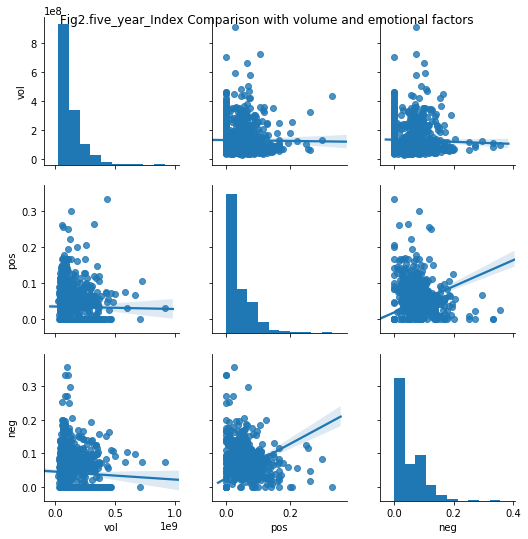

In [30]:
# Parameters:
# data: pandas.DataFrame [Tidy (long-form) dataframe where each column is a variable and each row is an observation.]
# diag_kind: {‘auto’, ‘hist’, ‘kde’, None} [Kind of plot for the diagonal subplots.]
# kind: {‘scatter’, ‘kde’, ‘hist’, ‘reg’} [Kind of plot to make.]
Fig_2 = pairplot(sharePricesTSLAwithEmotion[['vol', 'pos', 'neg']], diag_kind='hist', kind='reg')
Fig_2.fig.suptitle('Fig2.five_year_Index Comparison with volume and emotional factors')
# save the fig1 to otherSource/
Fig_2.savefig('file/Fig2.five_year_Index Comparison with volume and emotional factors.png')